In [2]:
# !pip install pystan==2.19.1.1
# !pip install prophet
# !pip install plotly

In [6]:
# Python
import pandas as pd
from prophet import Prophet
import os

In [7]:
files = os.listdir('/home/dazai/Documents/Data challenge/Data/Aggregated')
files.sort()
files[6]

'2016_street.feather'

In [9]:
path = '/home/dazai/Documents/Data challenge/Data/Aggregated'


for i in files[6:9]:
    if not 'df_data' in globals():
        df_data = pd.read_feather(f"{path}/{i}")
        df_data = df_data.drop(columns=['index'])
    else:
        df_new = pd.read_feather(f"{path}/{i}")
        df_new = df_new.drop(columns=['index'])
        df_data = pd.concat([df_data, df_new], ignore_index=True)


df_data


# df_data = df_data.iloc[:30000]
# df_test = pd.read_feather(f"{path}/2017_street.feather")
# df_test = df_test.drop(columns=['index'])
# df_data

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,None,2016-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.511927,51.409435,On or near Harlech Close,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,None,NaN
1,None,2016-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.495055,51.422132,On or near Cross Street,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,None,NaN
2,2163e1bf85d197a93f9c1c6daeb113ad0e0fbd3a8b603f...,2016-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.513308,51.409456,On or near Charlton Road,E01014399,Bath and North East Somerset 001A,Burglary,Under investigation,NaN
3,74f4fc07b60510a8862f77180de1c8bf1a0755105ec494...,2016-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.511761,51.409966,On or near Caernarvon Close,E01014399,Bath and North East Somerset 001A,Burglary,Under investigation,NaN
4,6c3dbed2ea67ad837bee1229ccf3951bd48f42e22421fe...,2016-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.511927,51.409435,On or near Harlech Close,E01014399,Bath and North East Somerset 001A,Other theft,Under investigation,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
25318947,b42aba9a6f49577cbc0a44c18b8bf7cdf1abfb420d76af...,2018-12,Wiltshire Police,Wiltshire Police,-1.759025,50.994654,On or near Petrol Station,E01031995,Wiltshire 062E,Public order,Investigation complete; no suspect identified,NaN
25318948,70686912d8044eb290b2cce6d3ab0d76c59ce661ce03dd...,2018-12,Wiltshire Police,Wiltshire Police,-1.761725,50.993275,On or near West Wick,E01031995,Wiltshire 062E,Vehicle crime,Investigation complete; no suspect identified,NaN
25318949,230739de3cb782e0ca08bac60bf52f553949b4e3bf4841...,2018-12,Wiltshire Police,Wiltshire Police,-1.730053,50.992658,On or near B3080,E01031995,Wiltshire 062E,Violence and sexual offences,Unable to prosecute suspect,NaN
25318950,ce5bd9e3ee7749b519c8003b0278417a251cabd076cae1...,2018-12,Wiltshire Police,Wiltshire Police,-1.748374,50.993202,On or near Green Lane,E01031995,Wiltshire 062E,Violence and sexual offences,Unable to prosecute suspect,NaN


In [62]:
print(df_data['Falls within'].value_counts())
df_data['Falls within'].value_counts().mean()



Metropolitan Police Service           994529
Greater Manchester Police             362115
West Yorkshire Police                 303681
West Midlands Police                  259860
South Yorkshire Police                192444
Hampshire Constabulary                185162
Northumbria Police                    180630
Lancashire Constabulary               179220
Thames Valley Police                  172866
Kent Police                           171787
Avon and Somerset Constabulary        171701
Essex Police                          170748
Merseyside Police                     159851
Police Service of Northern Ireland    157414
Sussex Police                         140543
South Wales Police                    133459
Devon & Cornwall Police               127428
West Mercia Police                    120770
Nottinghamshire Police                114894
Staffordshire Police                  113260
Hertfordshire Constabulary            102827
Derbyshire Constabulary                95401
Cleveland 

134318.8

In [10]:
district = df_data[df_data['Falls within']=='South Wales Police']
predict = {}

district = district.sort_values(by=['Month'])
months = district['Month'].unique()
for i in months:
    predict[i] = len(district[district['Month']==i])
predict = pd.DataFrame({'ds': list(predict.keys()), 'y': list(predict.values())})

In [11]:
predict['ds'] = pd.to_datetime(predict['ds'])


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -47.609
Iteration  1. Log joint probability =    26.3755. Improved by 73.9845.
Iteration  2. Log joint probability =      38.55. Improved by 12.1745.
Iteration  3. Log joint probability =    52.7764. Improved by 14.2264.
Iteration  4. Log joint probability =    58.1906. Improved by 5.41421.
Iteration  5. Log joint probability =    59.5083. Improved by 1.31771.
Iteration  6. Log joint probability =    67.1492. Improved by 7.64087.
Iteration  7. Log joint probability =    67.1596. Improved by 0.0104474.
Iteration  8. Log joint probability =    67.1978. Improved by 0.0381391.
Iteration  9. Log joint probability =    67.2169. Improved by 0.0191161.
Iteration 10. Log joint probability =    67.2532. Improved by 0.0363466.
Iteration 11. Log joint probability =    67.7903. Improved by 0.537048.
Iteration 12. Log joint probability =    68.0993. Improved by 0.309072.
Iteration 13. Log joint probability =    68.2253. Improved by 0.125942.
Iteration 14. Log joint p

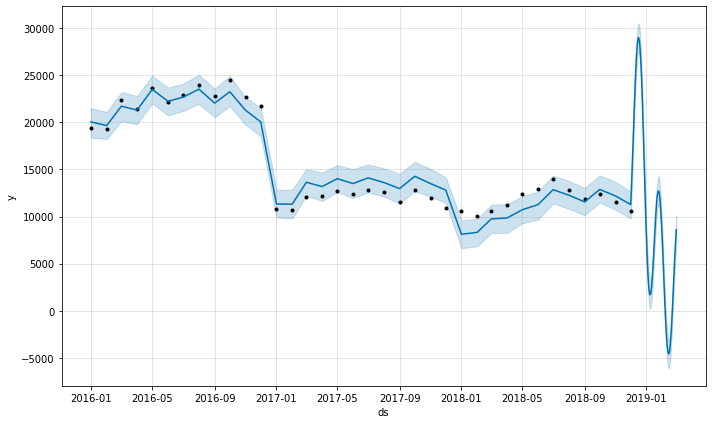

In [12]:
# m = Prophet()
# m.fit(predict)

m = Prophet(seasonality_mode='multiplicative').fit(predict)
future = m.make_future_dataframe(periods=90)
fcst = m.predict(future)
fig = m.plot(fcst)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Gradient evaluation took 5e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 4.4e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 4.7e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 300 [  0%]  (Warmup)
Iteration:   1 / 300 [  0%]  (Warmup)
Iteration:   1 / 300 [  0%]  (Warmup)

Gradient evaluation took 5.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.51 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 300 [  0%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.



Iteration:  30 / 300 [ 10%]  (Warmup)
Iteration:  30 / 300 [ 10%]  (Warmup)
Iteration:  30 / 300 [ 10%]  (Warmup)
Iteration:  30 / 300 [ 10%]  (Warmup)
Iteration:  60 / 300 [ 20%]  (Warmup)
Iteration:  60 / 300 [ 20%]  (Warmup)
Iteration:  60 / 300 [ 20%]  (Warmup)
Iteration:  60 / 300 [ 20%]  (Warmup)
Iteration:  90 / 300 [ 30%]  (Warmup)
Iteration:  90 / 300 [ 30%]  (Warmup)
Iteration:  90 / 300 [ 30%]  (Warmup)
Iteration:  90 / 300 [ 30%]  (Warmup)
Iteration: 120 / 300 [ 40%]  (Warmup)
Iteration: 120 / 300 [ 40%]  (Warmup)
Iteration: 120 / 300 [ 40%]  (Warmup)
Iteration: 150 / 300 [ 50%]  (Warmup)
Iteration: 151 / 300 [ 50%]  (Sampling)
Iteration: 120 / 300 [ 40%]  (Warmup)
Iteration: 150 / 300 [ 50%]  (Warmup)
Iteration: 151 / 300 [ 50%]  (Sampling)
Iteration: 180 / 300 [ 60%]  (Sampling)
Iteration: 150 / 300 [ 50%]  (Warmup)
Iteration: 151 / 300 [ 50%]  (Sampling)
Iteration: 180 / 300 [ 60%]  (Sampling)
Iteration: 210 / 300 [ 70%]  (Sampling)
Iteration: 150 / 300 [ 50%]  (Warmup)


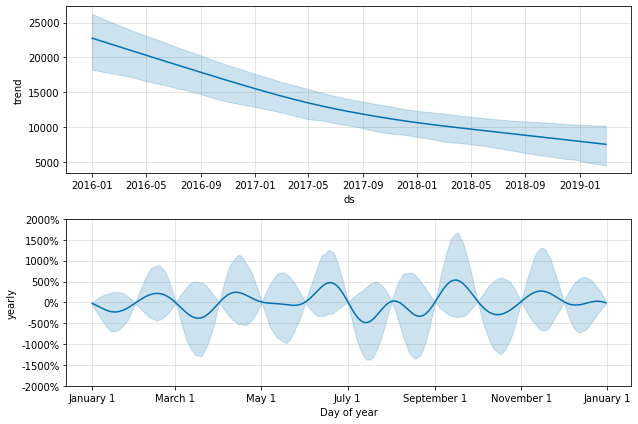

In [13]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(predict)
fcst = m.predict(future)
fig = m.plot_components(fcst)

In [80]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3659,2026-11-27,28754.505085,27986.772338,29561.662701
3660,2026-11-28,28759.126610,28029.593583,29590.938167
3661,2026-11-29,28763.748134,28047.400132,29499.106403
3662,2026-11-30,28768.369658,27951.327102,29542.228971
3663,2026-12-01,28772.991183,28011.821883,29544.202383


In [52]:
# df_predict = df_data[~df_data.isna()]
# df_predict

In [53]:
# df_data.loc[[129657]]

In [54]:
# df_predict = df_data[['Month', 'Longitude', 'Latitude']].reset_index()
# index = df_predict.pop('index')
# df_predict.insert(1, 'index', index)


# df_predict.columns = ['ds', 'y', 'add1', 'add2']

# df_predict
